In [97]:
#import path ../../..
import sys
sys.path.append('../')
from parse_util import parse_train_log_avgStep_file, parse_inf_log_avgStep_file
parse_train_log_avgStep_file("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0617/ccv100_logs/baseline/train/RUN1/LS0/speech-recognition/openai/whisper-large-v2_batch1/BE_albert/albert-base-v2_batch2/BE_recommend_MPS10.log")
parse_inf_log_avgStep_file("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/baseline/inf/RUN1/LS0/speech-recognition/openai/whisper-large-v2_batch1/BE_bert-base-cased_batch16/BE_recommend_MPS40.log")


Number of steps: 91
Time elapsed: 42.074 seconds
Average step time: 2.1629 steps/second
average time for each step: 0.4624 seconds/step
entries 92, 92
Average step time: 3.2193 steps/second
average time for each step: 0.3106 seconds/step
entries 793, 793


3.219276638294759

In [141]:
THREAD_PERCENTAGES = [i for i in  range(10, 101, 10)]
BASELINE_THREADS = ["MPS" + str(i) for i in  THREAD_PERCENTAGES]
import os
from collections import defaultdict
#check if 'baseline_labels.csv' exists
if os.path.exists('baseline_steps_stage2.csv'):
    print("baseline_labels.csv exists. this block will erase sm, mem columns ")
    exit(1)

base_type_times, base_type_sm, base_type_mem = [], [], []
inf_directory_path = '/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/baseline/inf'
train_directory_path = '/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/baseline/train'
                        

train_file_steps = get_all_base_avgStep(train_directory_path, "train")
inf_file_steps = get_all_base_avgStep(inf_directory_path, "inf")
train_file_steps.update(inf_file_steps)

# Define the percentages
percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#write baseline to csv
import csv
# Prepare the data for writing to CSV
rows = []
for workload, values in train_file_steps.items():
    row = [workload]
    value_dict = dict(values)
    for percent in percentages:
        row.append(value_dict.get(percent, None))
    rows.append(row)

# Write to CSV
with open('baseline_steps_stage2.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write header
    header = ['workload'] + percentages
    csvwriter.writerow(header)
    
    # Write data
    csvwriter.writerows(rows)



baseline_labels.csv exists. this block will erase sm, mem columns 
BE_imgclassification_MPS40.log
/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/baseline/train/BE_vit_h_14_batch8/BE_imgclassification_MPS40.log
vit_h_14_batch8 MPS40
batch_size: 8
Number of steps: 91
Time elapsed: 159.416 seconds
Average step time: 0.5708 steps/second
average time for each step: 1.7518 seconds/step
entries len(timestamps), len(average_step_times)
Number of steps: 91
Time elapsed: 159.416 seconds
Average step time: 0.5708 steps/second
average time for each step: 1.7518 seconds/step
entries len(timestamps), len(average_step_times)
BE_imgclassification_MPS80.log
/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/baseline/train/BE_vit_h_14_batch8/BE_imgclassification_MPS80.log
vit_h_14_batch8 MPS80
batch_size: 8
Number of steps: 91
Time elapsed: 88.419 seconds
Average step time: 1.0292 steps/second
a

In [68]:
#parse share directory
#PARAMETER
#directory: the directory of the share test
#LStype: the type of the LS, train or inf
#BEtype: the type of the BE, train or inf
#LSpercent: the percentage of the LS
import pandas as pd
from collections import defaultdict
import sys
sys.path.append('../')
from parse_util import *
base_df = pd.read_csv("baseline_steps_stage2.csv")
#get all models from basedf workload column
all_models = base_df["workload"].tolist()
print(all_models)

share_file_steps = defaultdict(dict)
share_directory_path = "/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/sharetest/LStrain_BEtrain/RUN1/"
share_file_steps = get_share_avgStep(share_directory_path, "train", "train", all_models=all_models)

share_file_steps

['vit_h_14_batch8-train', 'mobilenet_batch16-train', 'vit_h_14_batch16-train', 'resnet-50_batch16-train', 'bert-base-cased_batch16-train', 'mobilenet_batch2-train', 'resnet-50_batch2-train', 'bert-base-cased_batch8-train', 'vit_h_14_batch2-train', 'albert-base-v2_batch2-train', 'albert-base-v2_batch8-train', 'albert-base-v2_batch16-train', 'resnet-50_batch8-train', 'bert-base-cased_batch2-train', 'mobilenet_batch8-train', 'whisper-large-v2_batch16-inf', 'whisper-large-v2_batch8-inf', 'whisper-large-v2_batch2-inf', 'bert-base-cased_batch16-inf', 'resnet-50_batch8-inf', 'resnet-50_batch2-inf', 'resnet-50_batch16-inf', 'bert-base-cased_batch8-inf', 'mobilenet_v2_1.0_224_batch2-inf', 'vit-base-patch16-224_batch8-inf', 'mobilenet_v2_1.0_224_batch8-inf', 'vit-base-patch16-224_batch2-inf', 'vit-base-patch16-224_batch16-inf', 'mobilenet_v2_1.0_224_batch16-inf', 'wav2vec2-base-960h_batch2-inf', 'wav2vec2-base-960h_batch16-inf', 'wav2vec2-base-960h_batch8-inf', 'bert-base-cased_batch2-inf']


NameError: name 'defaultdict' is not defined

In [137]:
#0505train_inf
inf_directory_path = '/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/0505baseline/inf'
train_directory_path = '/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/0505baseline/train'
                        

base_train_file_steps_0522 = get_all_base_avgStep(train_directory_path, "train")
base_inf_file_steps_0522 = get_all_base_avgStep(inf_directory_path, "inf")
base_train_file_steps_0522.update(base_inf_file_steps_0522)

#write baseline to csv
import csv
# Prepare the data for writing to CSV
rows = []
for workload, values in base_train_file_steps_0522.items():
    row = [workload]
    value_dict = dict(values)
    for percent in percentages:
        row.append(value_dict.get(percent, None))
    rows.append(row)

# Write to CSV
with open('0522baseline_steps_stage2.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write header
    header = ['workload'] + percentages
    csvwriter.writerow(header)
    
    # Write data
    csvwriter.writerows(rows)

#train_inf_file_steps = get_share_avgStep("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0505_01/ccv100_logs/LStrain_BEinf/RUN1", "train", "inf")
#train_inf_file_steps

BE_imgclassification_MPS50.log
/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/0505baseline/train/RUN1/LS0/speech-recognition/openai/whisper-large-v2_batch1/BE_vit_h_14_batch8/BE_imgclassification_MPS50.log
vit_h_14_batch8 MPS50
batch_size: 8
Number of steps: 191
Time elapsed: 272.129 seconds
Average step time: 0.7019 steps/second
average time for each step: 1.4248 seconds/step
entries len(timestamps), len(average_step_times)
Number of steps: 191
Time elapsed: 272.129 seconds
Average step time: 0.7019 steps/second
average time for each step: 1.4248 seconds/step
entries len(timestamps), len(average_step_times)
BE_imgclassification_MPS100_gpu_info_smi.csv
BE_imgclassification_MPS100.log
/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0527/ccv100_logs/0505baseline/train/RUN1/LS0/speech-recognition/openai/whisper-large-v2_batch1/BE_vit_h_14_batch8/BE_imgclassification_MPS100.log
vit_h_14_batch8 M

In [125]:
inf_inf_file_steps = get_share_avgStep("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0520/ccv100_logs/sharetest/LSinf_BEinf/RUN1", "inf", "inf")


LS_recommend_MPS90.log
['', 'Users', 'bing', 'Library', 'CloudStorage', 'OneDrive-StonyBrookUniversity', 'SBU', 'mlsys', 'cclogs', 'ccv100_0520', 'ccv100_logs', 'sharetest', 'LSinf_BEinf', 'RUN1', 'LS90', 'recommend', 'bert-base-cased_batch2', 'BE_openai', 'whisper-large-v2_batch16', 'LS_recommend_MPS90.log']
bert-base-cased_batch2
LS BE: bert-base-cased_batch2 whisper-large-v2_batch16
/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/cclogs/ccv100_0520/ccv100_logs/sharetest/LSinf_BEinf/RUN1/LS90/recommend/bert-base-cased_batch2/BE_openai/whisper-large-v2_batch16/LS_recommend_MPS90.log
whisper-large-v2_batch16 MPS90
batch_size: 16
Average step time: 41.5535 steps/second
average time for each step: 0.0241 seconds/step
entries 9993, 9993
Average step time: 41.5535 steps/second
average time for each step: 0.0241 seconds/step
entries 9993, 9993
BE_speech-recognition_MPS10.log
['', 'Users', 'bing', 'Library', 'CloudStorage', 'OneDrive-StonyBrookUniversity', 'SBU', 'ml

KeyboardInterrupt: 

In [126]:
#save share_file_steps to a csv file
import csv
def save_share_file_steps(share_file_steps,filename):
    # Define the thread combinations
    thread_combinations = [(10, 90), (20, 80), (30, 70), (40, 60), (50, 50), (60, 40), (70, 30), (80, 20), (90, 10), (100, 100)]

    # Write to CSV
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write header
        header = ['workload1', 'workload2'] + [f'(LS{ls}, BE{be})' for ls, be in thread_combinations]
        csvwriter.writerow(header)
        
        # Write data
        for (workload1, workload2), throughput_dict in share_file_steps.items():
            row = [workload1, workload2]
            for ls, be in thread_combinations:
                ls_key = f'LS{ls}_{workload1}'
                be_key = f'BE{be}_{workload2}'
                ls_value = throughput_dict.get(ls_key, None)
                be_value = throughput_dict.get(be_key, None)
                row.append((ls_value, be_value))
            csvwriter.writerow(row)
save_share_file_steps(train_inf_file_steps,'0505share_inf-inf__steps_stage2.csv')

In [9]:
#calculate relative throughput gain from base file
#get relative throughput gain by dividing the throughput of each pair by the 100 percent throughput
import pandas as pd
base_df =  pd.read_csv("0522baseline_steps_stage2.csv")
def get_base_relative_throughput_gain(file_steps):
    relative_throughput_gain = {}
    for key, value in file_steps.items():
        #value is a list of tuples(percent, throughput), get throughput of 100 percent first
        Max_throughput = max(value, key=lambda x: x[0])[1]
        

        
        relative_throughput_gain[key] = [(int(i[0]), i[1]/Max_throughput ) for i in value if i[0] != 100]
        #exclue 100 percent throughput

    return relative_throughput_gain
train_relative_throughput = get_base_relative_throughput_gain(base_df)

train_relative_throughput

ValueError: invalid literal for int() with base 10: 'v'

In [2]:

# Define the x locations for the groups
filename_type_dict = {'wav2vec2-base-960h' : 'Wav2vec2', 'bert-base-cased': 'BERT',
                      'mobilenet': 'mobile', 'mobilenet_v2_1.0_224' : 'mobile','vit' : 'ViT', 
                      'vit_h_14' : 'ViT', 'whisper-large-v2': 'Whisper', 'vit-base-patch16-224' : "ViT",
                      'albert-base-v2' : 'ALBERT'}
eight_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
key_color_dict = {'_Threads': 'r', '_Compute (SM) Throughput': 'c', '_DRAM Throughput': 'm', '_Memory Throughput': 'y', 
                  '_Registers': 'pink', 'exclusive_throughput': 'maroon', 'sm%': 'y', 'mem%': 'green', 'memcap': '#82cbec', 
                  'ground truth': 'b', 'random': 'orange', 'prediction': 'black', 'KACE': 'black','KACE_LR': 'black' ,
                  'hotcloud_RF': 'r', 'hotcloud': 'r', 'Xu et al.':'r', 'best_rule_based_value': 'gray', 'ground_truth value': 'b', "NN": "c", "RF": "m", "AutoML": "r",
                 }
label_model_dict = {'ground truth': 'Oracle', 'KACE': 'KACE_LR', 'hotcloud': 'Xu et al.', 'best_rule_based_value': 'Best rule based', 'sm%': 'SM%', 'mem%': 'MEM%', 'memcap': 'MEMCAP', 'random': 'Random', 'NN': 'KACE_NN', 'RF': 'KACE_RF', 'AutoML': 'KACE_AutoML', 'exclusive_throughput':'exclusive_throughput'}
def shorten_label(label):
    for key, value in filename_type_dict.items():
        if key in label:
            #split the label by '-' in last occurence
            batch_type = label.rsplit('_', 1)[1]
            print(label.rsplit('_', 1)[0])
            batch_type = batch_type.replace('batch', 'b')
            #print(label.rsplit('_', 1))
            #capitalize the first letter
            #value = value.capitalize()
            return value+ '_' + batch_type
    return label


#cp_keys = ['ground truth', 'KACE', 'hotcloud_RF', 'best_rule_based_value', 'sm%','mem%', 'memcap', 'random']
#base - KACE not included
all_models = ["NN", "RF", "AutoML"]
cp_keys = list(set(['ground truth', 'KACE', 'sm%','mem%', 'memcap', 'best_rule_based_value']).union(set(all_models)))
#occurences - to dataset % 
n_total_dataset = 181
n_train_dataset = [29, 43, 54, 65, 76,88,97,108,119]
n_train_dataset_perct = [100*x/n_total_dataset for x in n_train_dataset]
print(n_train_dataset_perct)
from matplotlib import pyplot as plt
label_font = 17
axis_font = 16
legend_font = 14
output_dir_prefix = "/Users/bing/Documents/RPE/ch7_conclusion"

[16.022099447513813, 23.756906077348066, 29.834254143646408, 35.91160220994475, 41.988950276243095, 48.61878453038674, 53.591160220994475, 59.668508287292816, 65.74585635359117]


plotting share throughput gain for bert-base-cased_batch2-inf - whisper-large-v2_batch16-inf
('LS10', 'LS20', 'LS30', 'LS40', 'LS50', 'LS60', 'LS70', 'LS80', 'LS90')
[(11.587171892554387, 23.366473647495194), (22.849397764085015, 22.080142341888497), (32.477073864090805, 20.865883520763326), (39.866813330558614, 19.277649624039043), (49.04337924196763, 18.465796433191393), (None, None), (64.99369056446682, 12.428354537644026), (74.49822552265069, 9.094762803961617), (83.10703190954042, 5.688589243035757), (None, None)]
Exclusing None results in percentage LS60, BE40
Exclusing None results in percentage LS100, BE0
bert-base-cased
whisper-large-v2
[0.13772933863195327]
[15    0.949927
Name: 100, dtype: float64, 15    0.897633
Name: 100, dtype: float64, 15    0.848269
Name: 100, dtype: float64, 15    0.783702
Name: 100, dtype: float64, 15    0.750697
Name: 100, dtype: float64, 15    0.505255
Name: 100, dtype: float64, 15    0.369733
Name: 100, dtype: float64, 15    0.23126
Name: 100, dtyp

/var/folders/0w/bdn63n6n4hl2ygc7z_zr3bbw0000gn/T/ipykernel_67045/2677064003.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


plotting share throughput gain for whisper-large-v2_batch2-inf - wav2vec2-base-960h_batch16-inf
('LS10', 'LS20', 'LS30', 'LS40', 'LS50', 'LS60', 'LS70', 'LS80', 'LS90')
[(0.6259127894846651, 96.2931800121535), (0.953601335041869, 117.74961059746495), (1.2369221254445188, 90.80490170148991), (1.3603250460899605, 94.0682222932554), (None, None), (1.5387960593440047, 94.2231166811508), (1.564272026905479, 77.69773318749293), (1.5023474178403755, 71.59987487400507), (1.4904418760937115, 47.070382789605674), (1.5453436356242376, 104.67745623618485)]
Exclusing None results in percentage LS50, BE50
whisper-large-v2
wav2vec2-base-960h
[0.36635161714393355]
[30    0.76296
Name: 100, dtype: float64, 30    0.932966
Name: 100, dtype: float64, 30    0.719475
Name: 100, dtype: float64, 30    0.745331
Name: 100, dtype: float64, 30    0.746558
Name: 100, dtype: float64, 30    0.615623
Name: 100, dtype: float64, 30    0.567307
Name: 100, dtype: float64, 30    0.372953
Name: 100, dtype: float64, 30    0

AssertionError: 

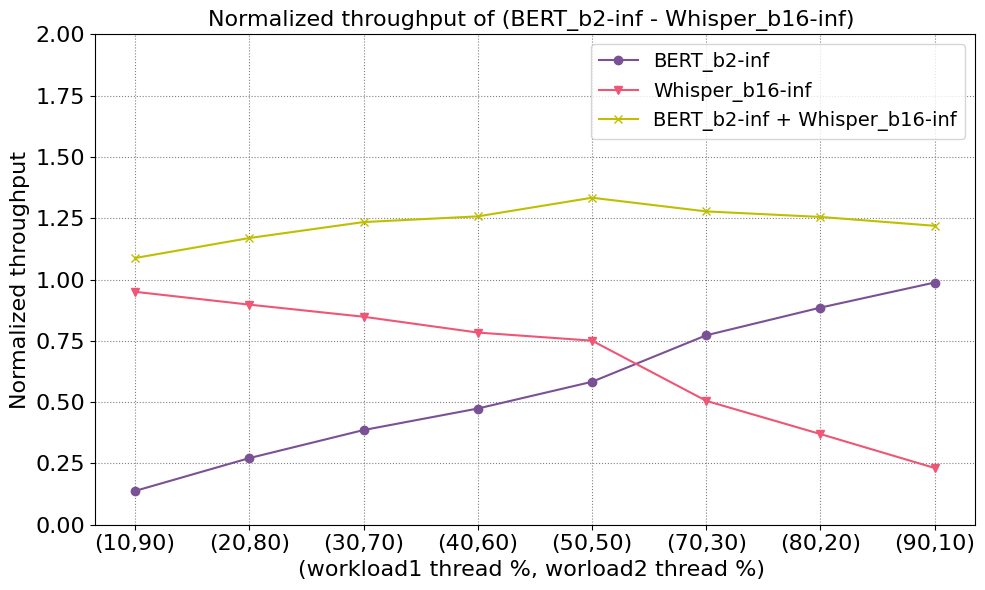

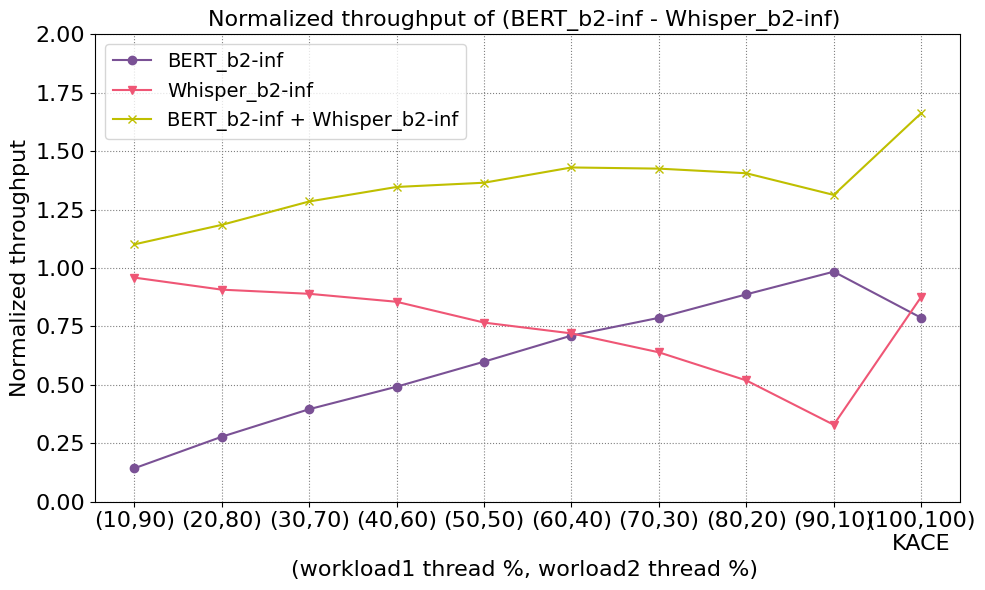

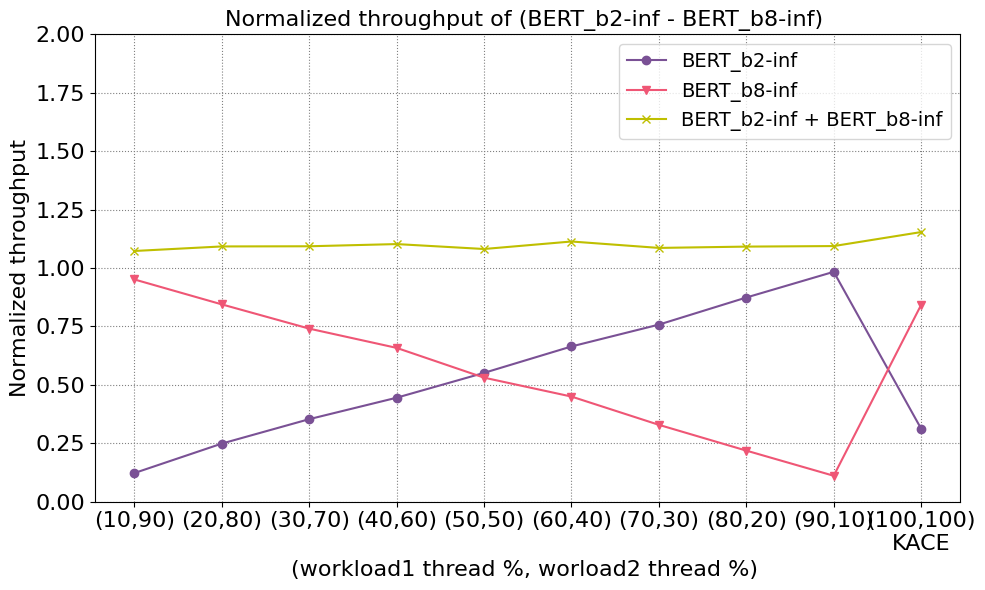

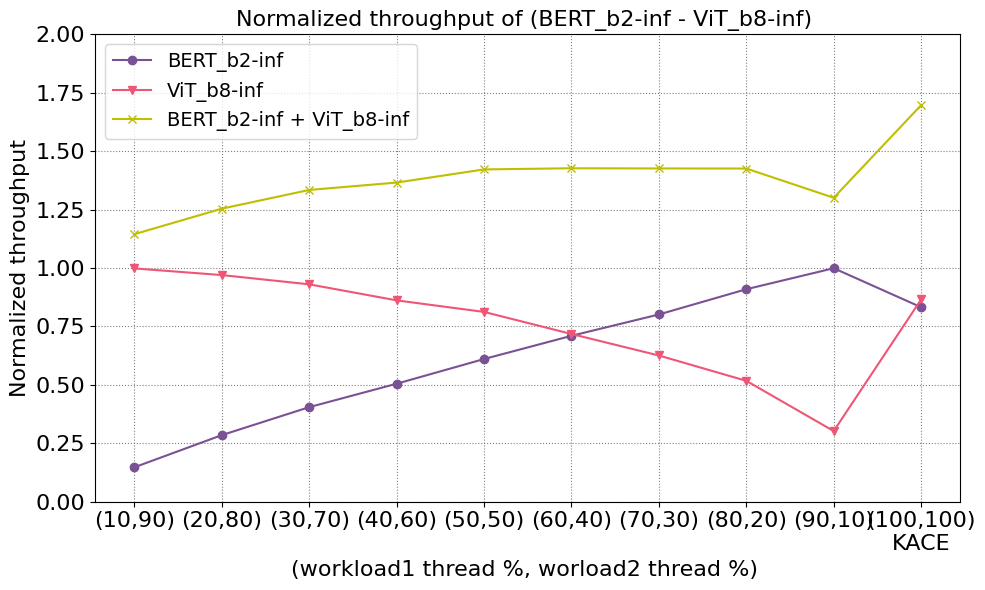

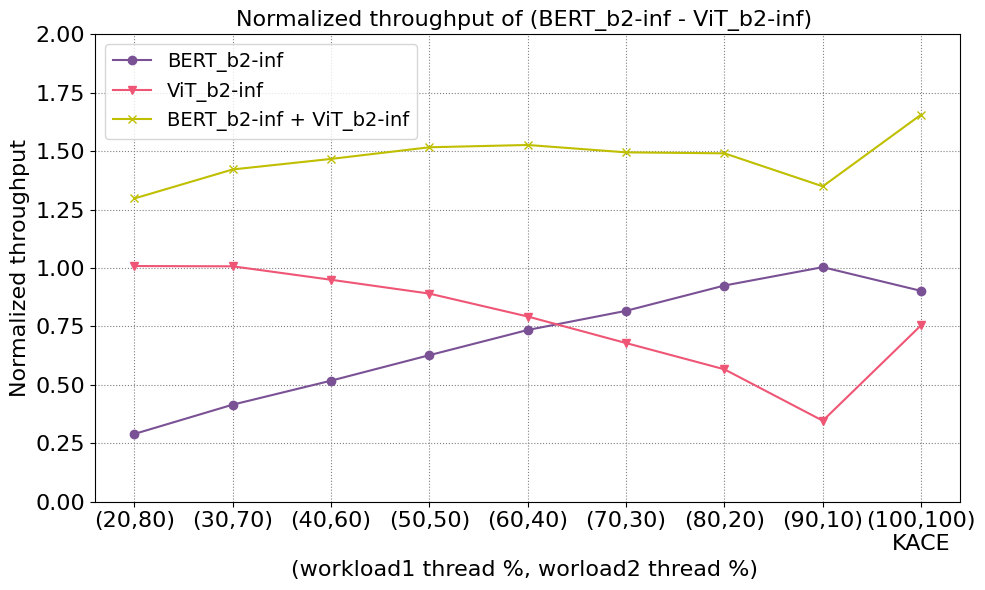

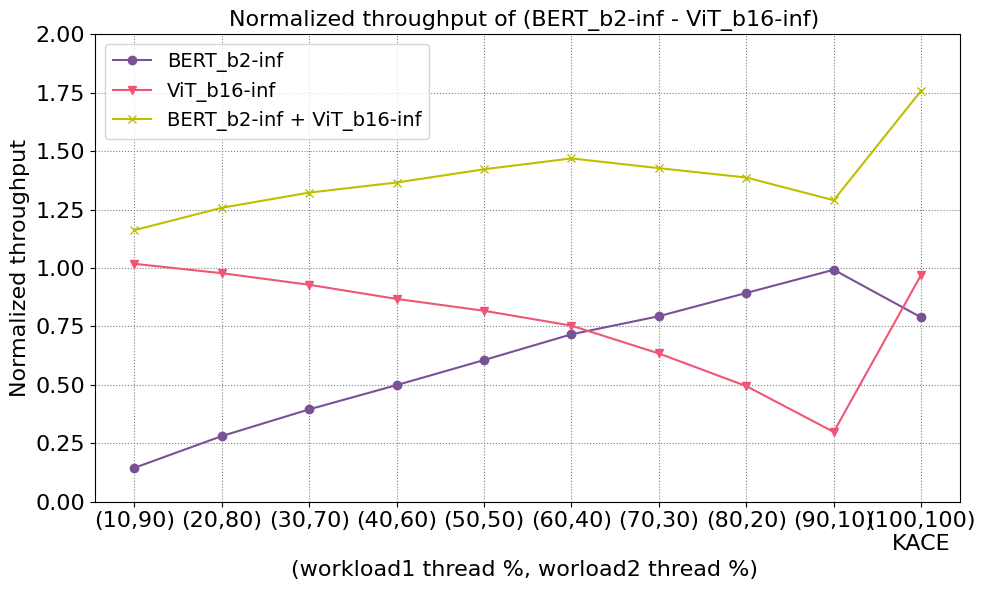

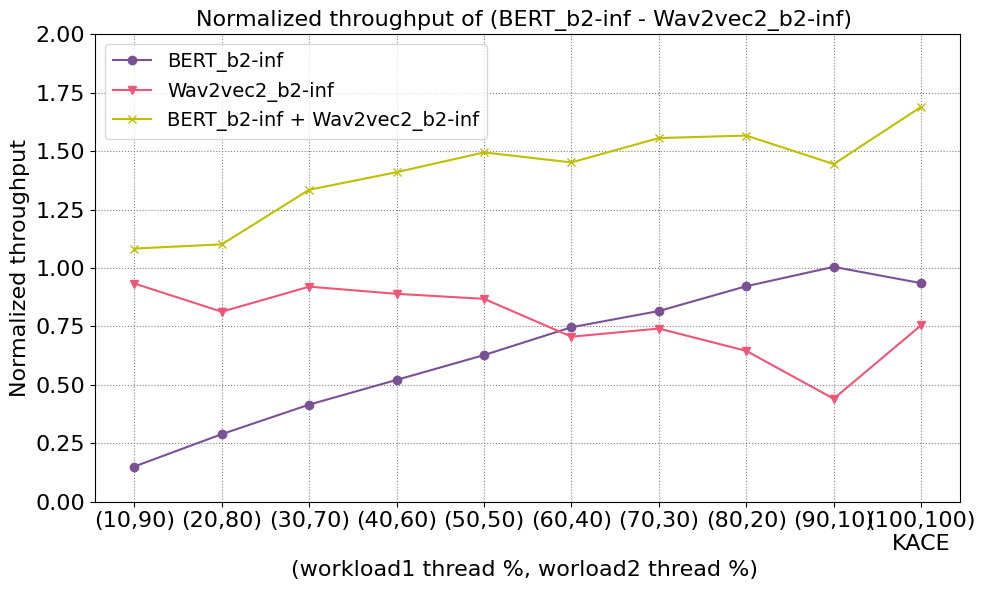

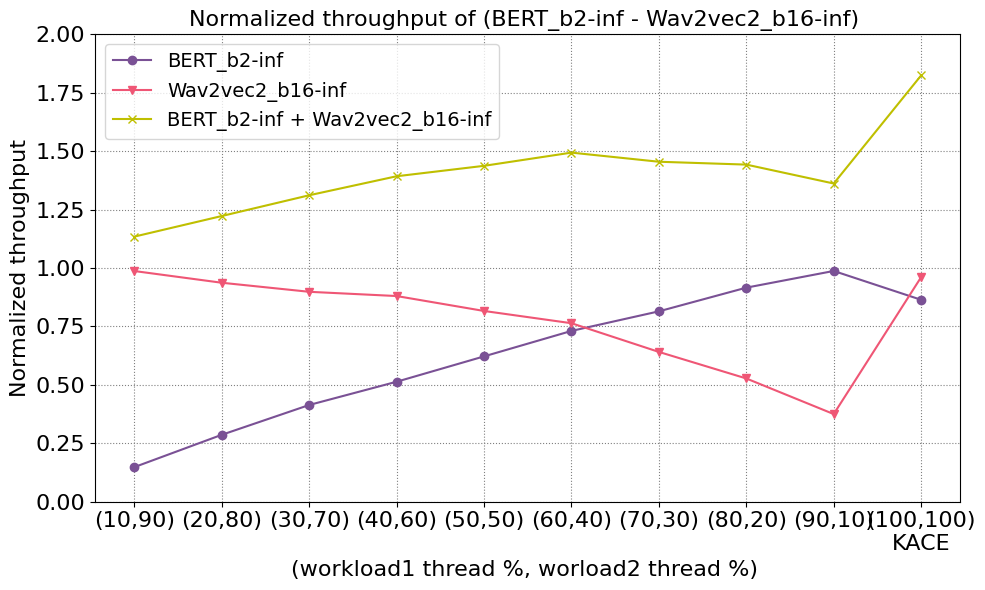

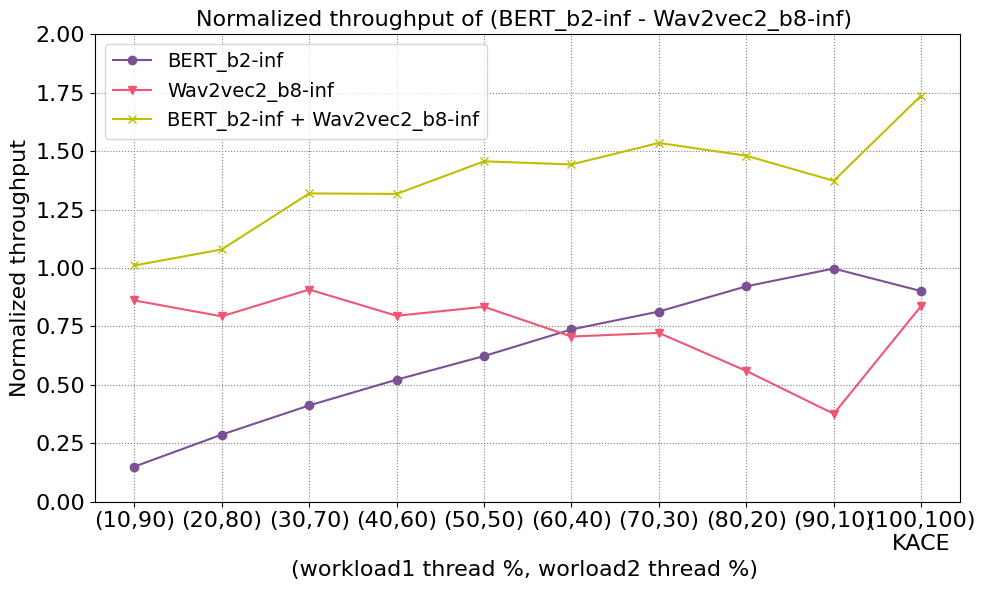

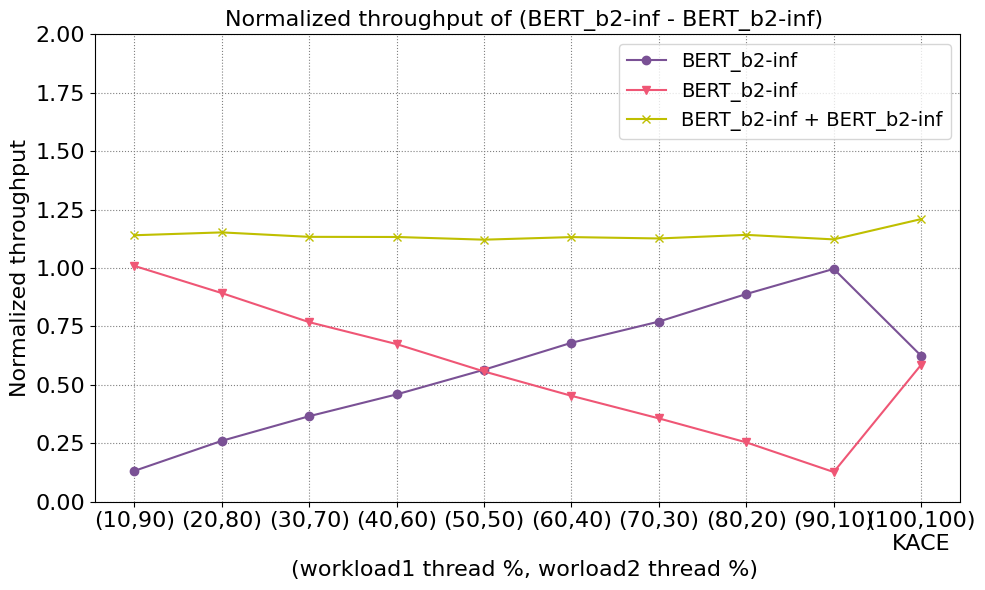

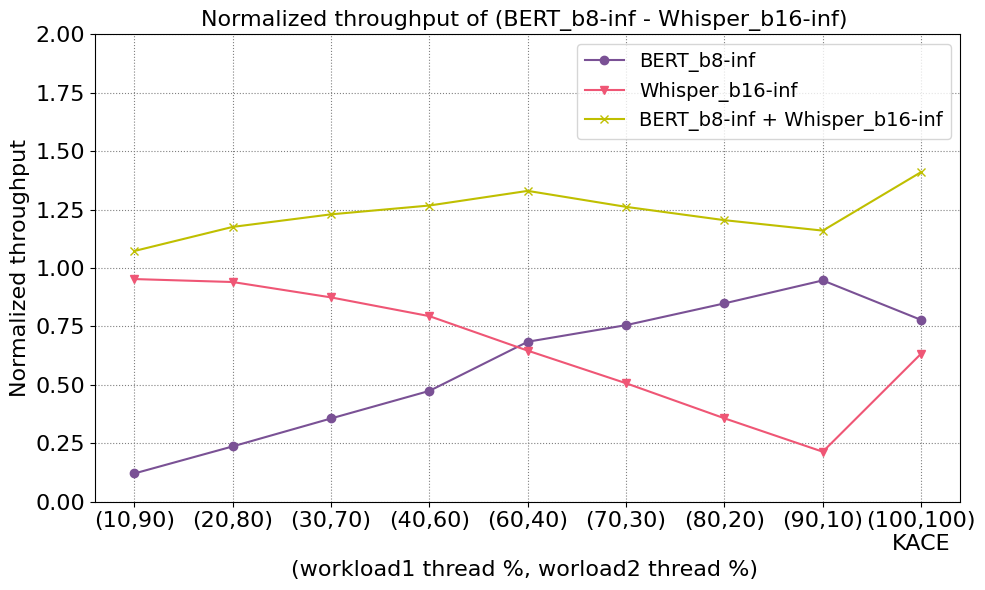

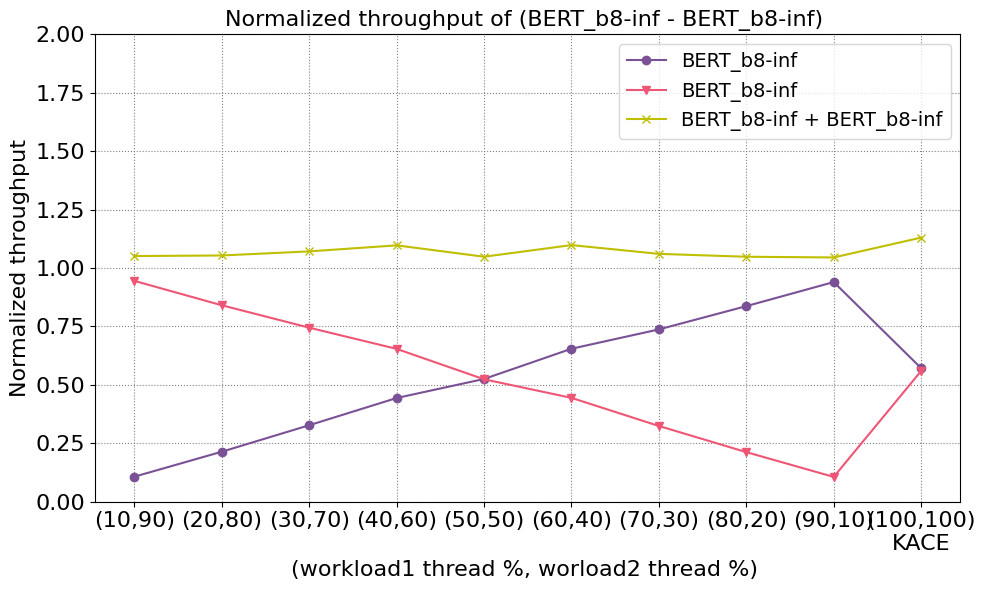

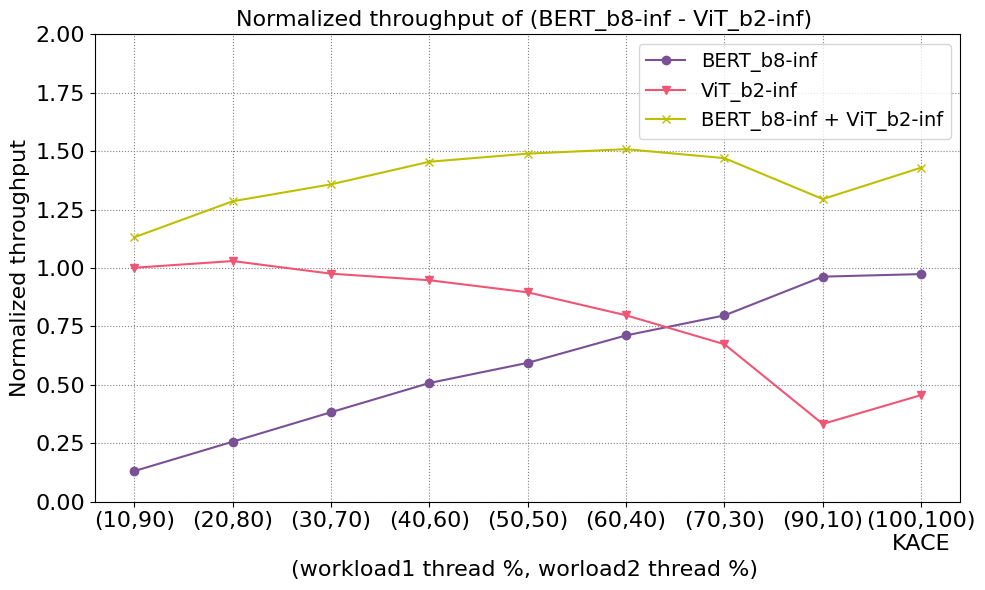

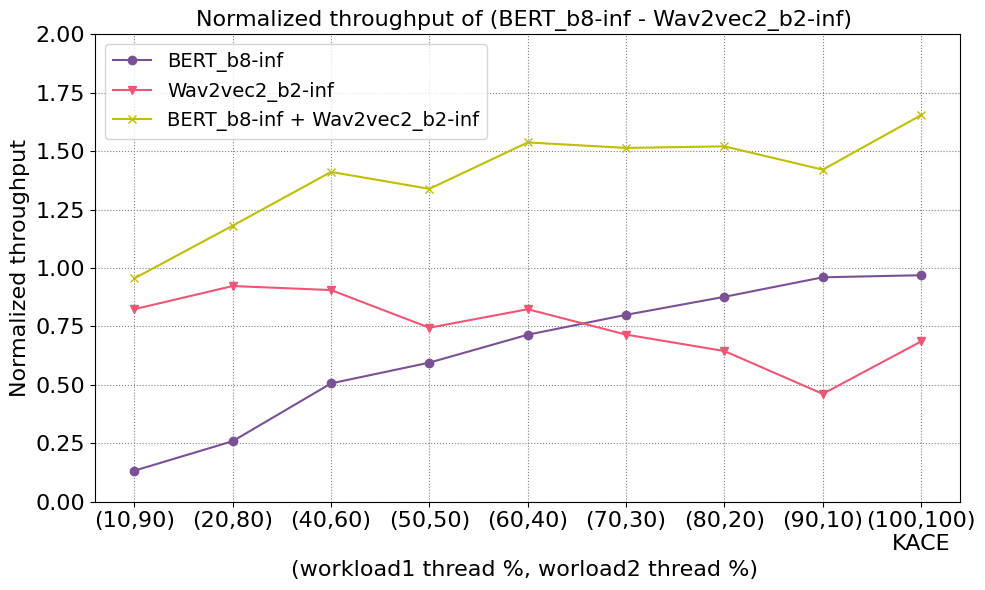

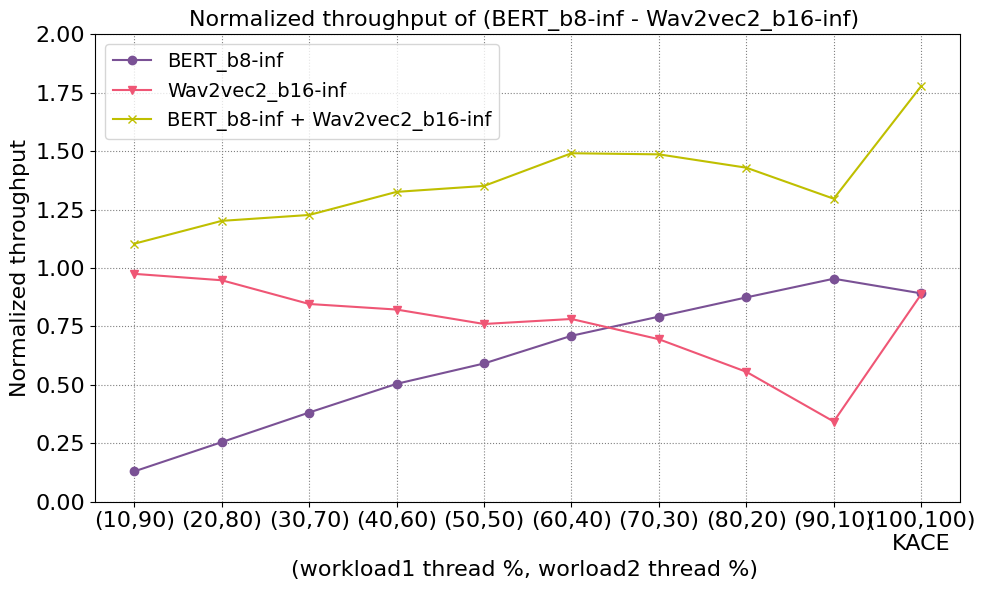

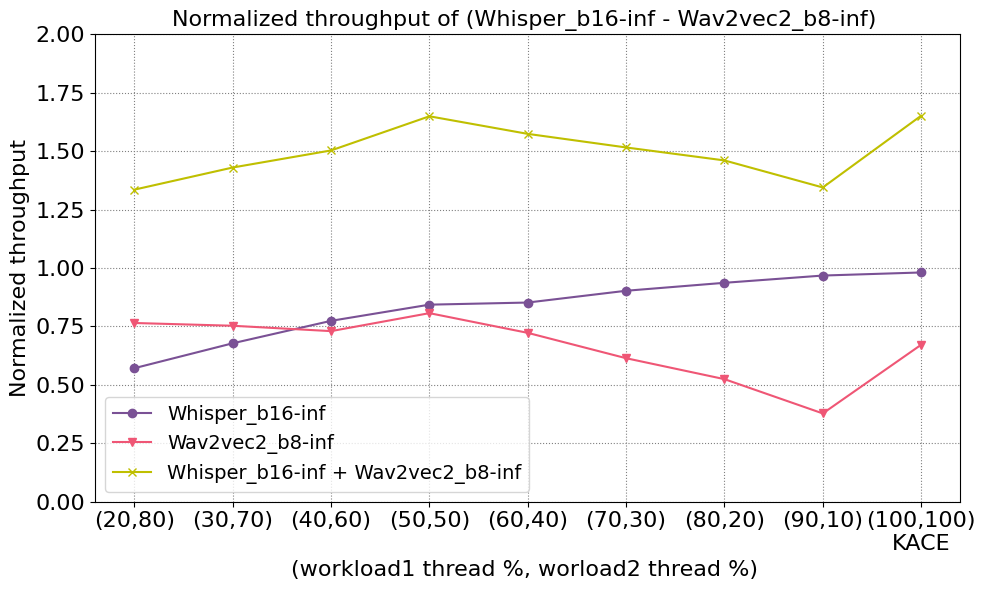

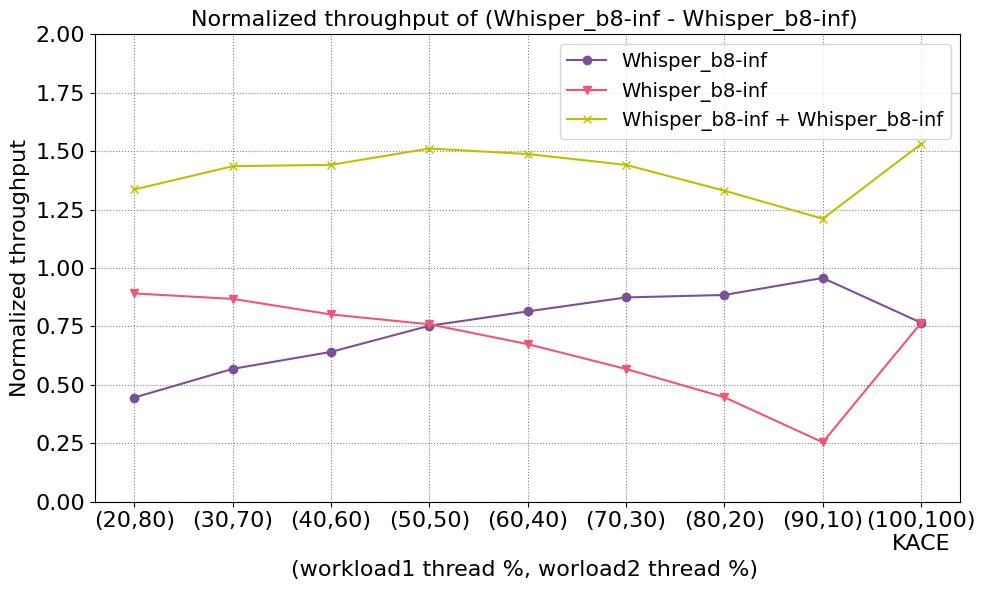

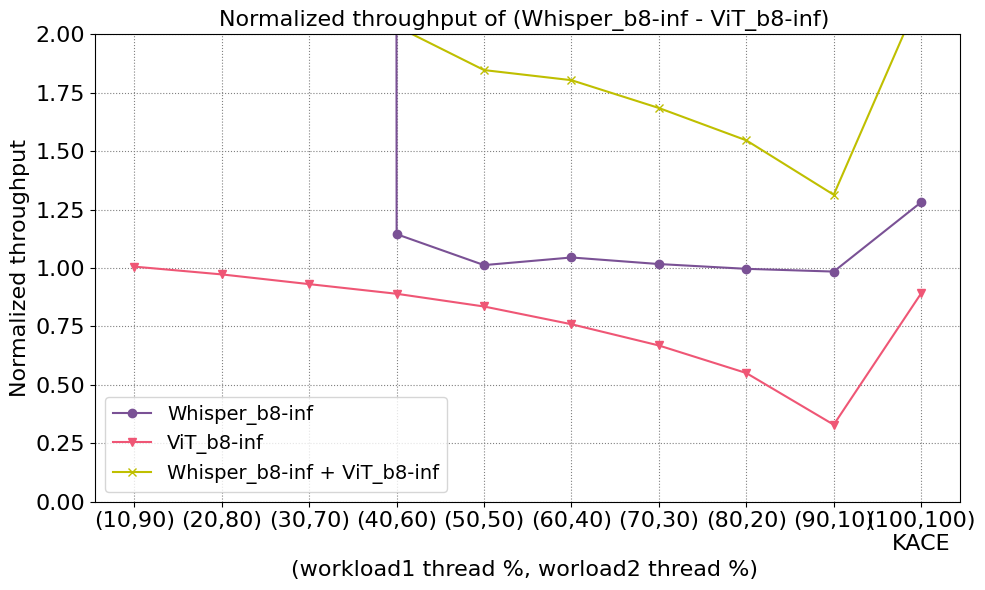

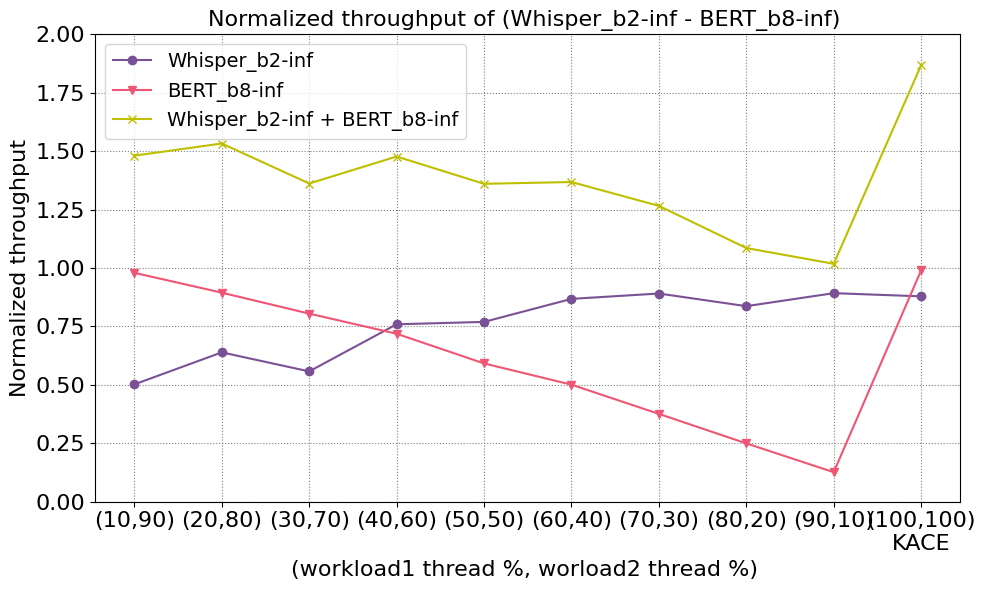

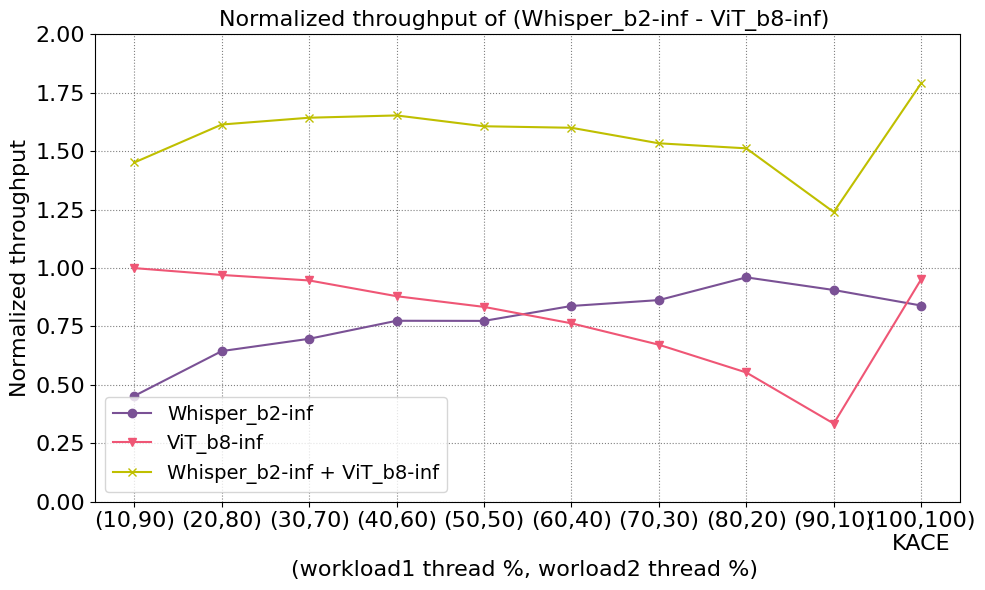

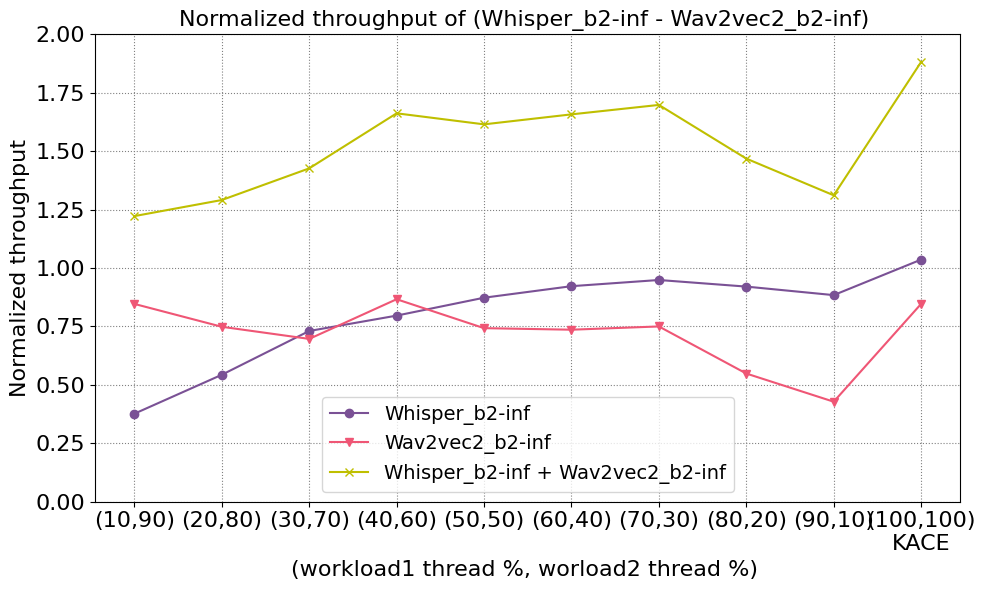

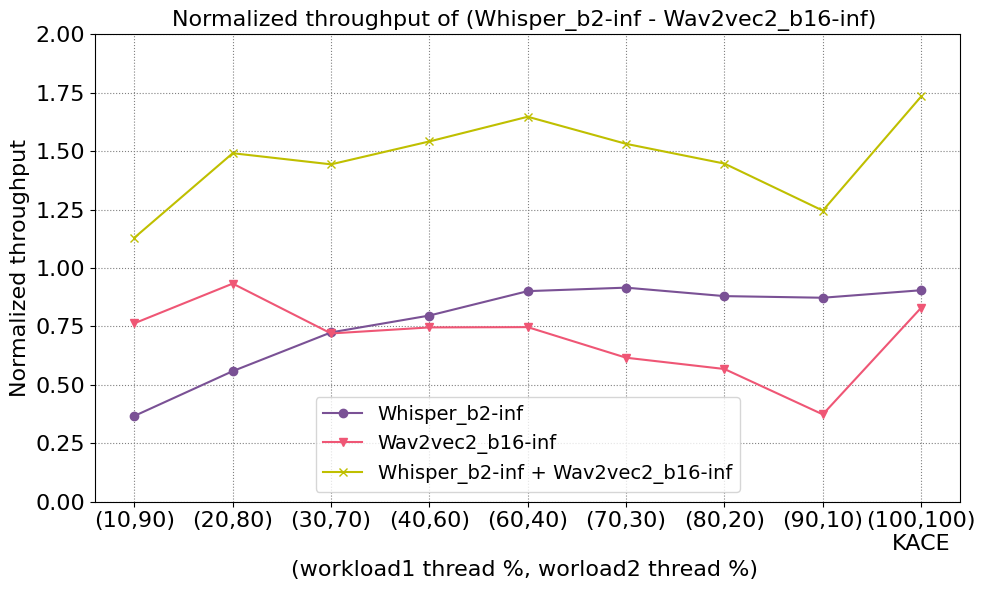

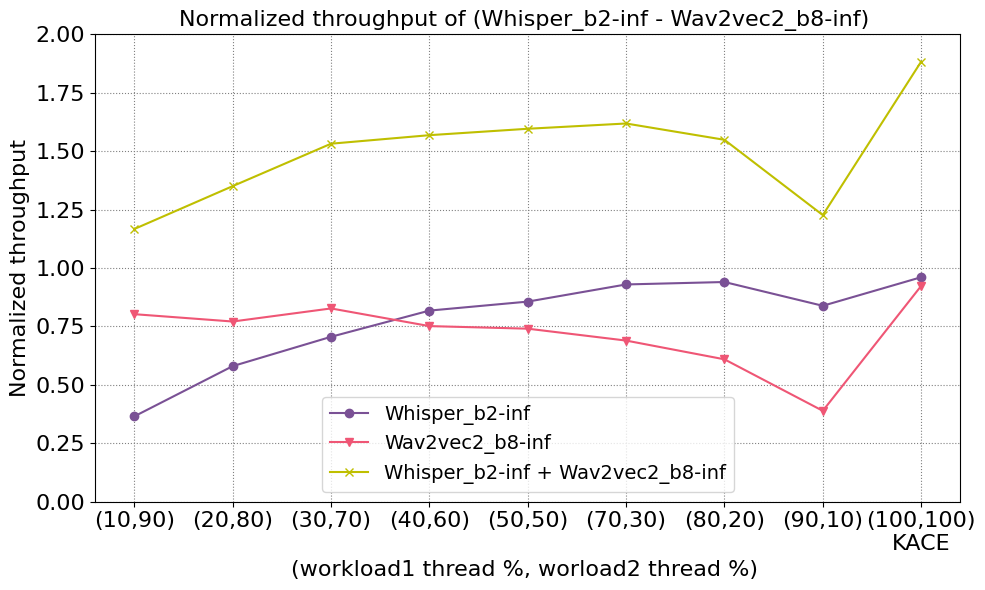

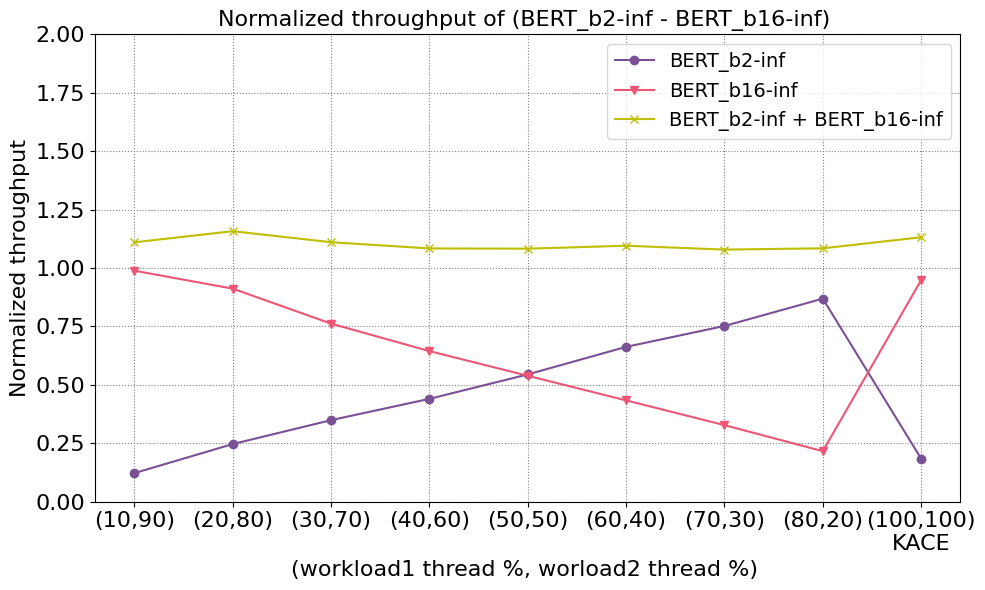

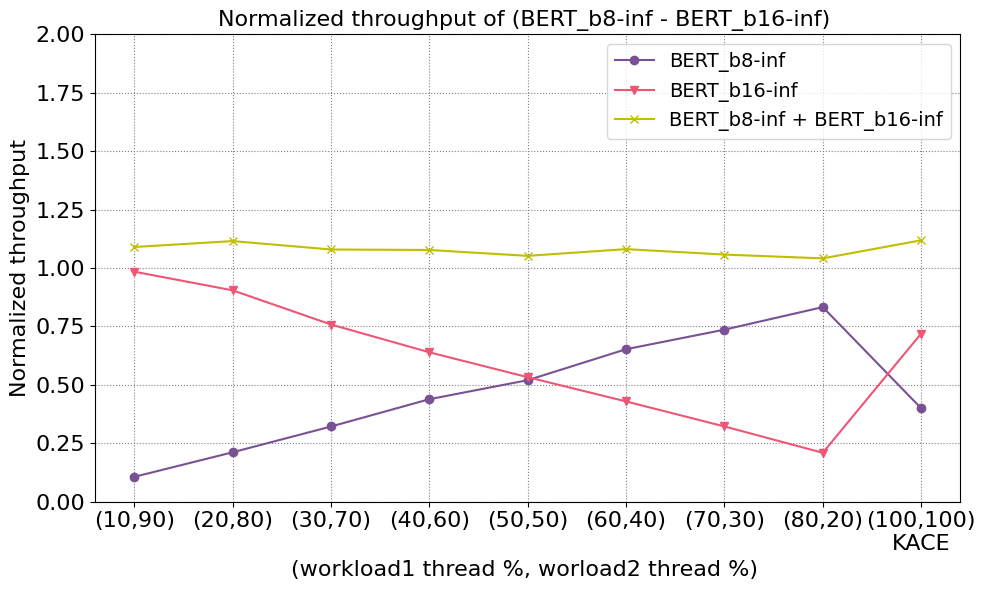

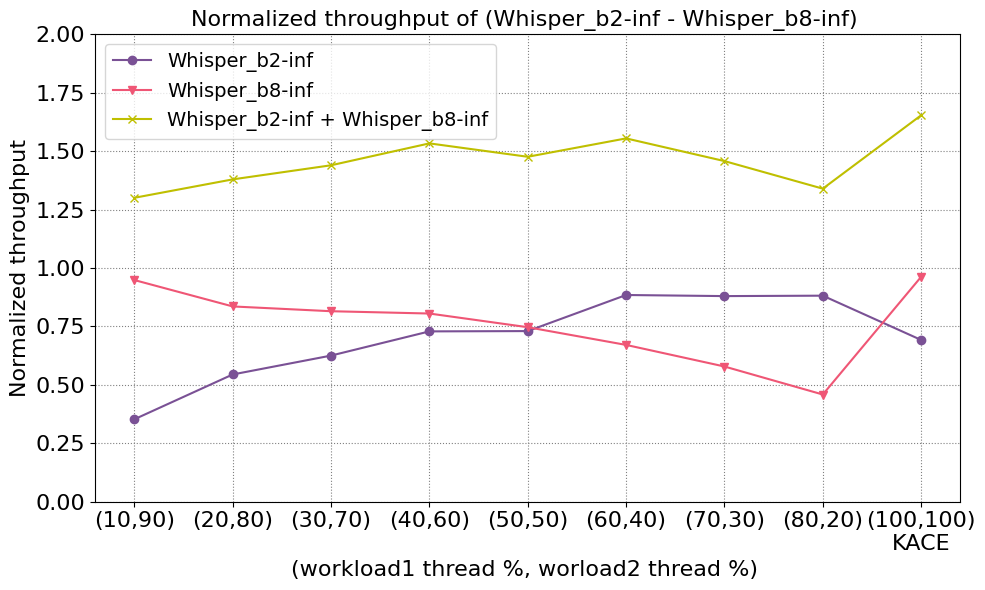

In [28]:
#plot share_throughput from 'share_steps_stage2.csv'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
# Load the data from the CSV file
#SHARE FILE
title_font = 16
axis_font = 16
legend_font = 14

def plot_share_throughput_gain(sharedf, basedf,workload1, workload2, outdir, is_relative_gain):
    #find df row as workload1 == worklaod1 and workload2==workload2
    print(f"plotting share throughput gain for {workload1} - {workload2}")
    
    row1 = sharedf[(sharedf['workload1'] == workload1) & (sharedf['workload2'] == workload2)]
    w1_base, w2_base = basedf[(basedf['workload'] == workload1)], basedf[(basedf['workload'] == workload2)]
    assert not row1.empty
    # Assuming your DataFrame is named 'df'
    column_names_list = sharedf.iloc[:,2:-1].columns.tolist()  # Get column names as a list. remove 100+100

    # Create a list comprehension to convert each string to a tuple
    list_of_tuples = [tuple(name.strip('()').split(", ")) for name in column_names_list]
    #exclude None values in list_of_tuples
    list_of_tuples = [i for i in list_of_tuples if all(i)]
    # Print the resulting list of tuples
    x_labels, _= zip(*list_of_tuples)
    print(x_labels)
    #x_labels, x_labels_rev = zip(*x)
    #print(x_labels)
    


    y_values = row1.iloc[:, 2:]
    
    #unpack every tuple in y_values to y1,y2
    y_values = [eval(y) for y in y_values.values[0]]
    print(y_values)
    #get index of y_value that includes None in any element
    None_index = [i for i, y in enumerate(y_values) if None in y]
    if None_index:
        for idx in None_index:
            print(f"Exclusing None results in percentage LS{(idx+1)*10}, BE{100-(idx+1)*10}")
    #exclude None index in x_labels
    x_labels = [x_labels[i] for i in range(len(x_labels)) if i not in None_index]
    #print(x_labels)
    #get the 100% throughput of each model and normalize
    if is_relative_gain:
        #share y
        y1, y2 = [y[0]/w1_base["100"]for y in y_values if all(y) ], [y[1]/w2_base["100"] for y in y_values if all(y)]
        
        exclusive_y1, exclusive_y2 = [  w1_base[i[2:]]/ w1_base["100"] for i in x_labels], [w2_base[str(100-int(i[2:]))]/ w2_base["100"] for i in x_labels]
        #add 100 relative gain
        #exclusive_y1.append(1.0)
        #exclusive_y2.append(1.0)
        #
        if not None_index or (max(None_index)+1)*10 != 100:
            #exclusive_y1.append(w1_base["100"])
            #exclusive_y2.append(w2_base["100"])
            x_labels.append('LS100')
        #x_labels.append('LS100')
        #add

    else:
        #not relative
        y1, y2 = [y[0] for y in y_values if all(y) ], [y[1] for y in y_values if all(y)]
        exclusive_y1, exclusive_y2 = [  w1_base[i[2:]] for i in x_labels], [w2_base[str(100-int(i[2:]))] for i in x_labels]

        
    #exclusive
    #print(exclusive_y2)
    
    # Create a figure and axis
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    workload1 = shorten_label(workload1)
    workload2 = shorten_label(workload2)
    print(y1[0].tolist())
    print(y2)
    y1_list =[y1[i].tolist()[0] for i in range(len(y1))]
    y2_list =[y2[i].tolist()[0] for i in range(len(y2))]
    
    #FIX: sum_y is Nan
    sum_y = [y1_list[i] + y2_list[i] for i in range(len(y1_list))]
    print(sum_y)

    
    
    print(sum_y)
    ax.plot(x_labels, y1, '#7a5195',marker='o', label=f"{workload1}")
    ax.plot(x_labels, y2, '#ef5675',marker='v', label=f"{workload2}")
    ax.plot(x_labels, sum_y, "y", marker='x', label=f"{workload1} + {workload2}")

    #ax.plot(x_labels, exclusive_y1, 'b--',marker='o', label=f"{workload1} Exclusive Gain")
    #ax.plot(x_labels, exclusive_y2, 'r--',marker='v', label=f"{workload2} Exclusive Gain")
    ax.set_xticks(x_labels, [f'({int(i[2:])},{100-int(i[2:])})' if '100' not in i else "(100,100)\nKACE" for i in x_labels])
    ax.tick_params(axis='both', labelsize=axis_font)
    ax.set_xlabel('(workload1 thread %, worload2 thread %) ', fontsize=axis_font)

    ax.set_ylabel('Normalized throughput', fontsize=axis_font) if is_relative_gain else plt.ylabel('Throughput', fontsize=axis_font)
    #set y axis to 0-1.2
    if is_relative_gain:
        ax.set_ylim(0, 2)
    ax.set_title(f'Normalized throughput of ({workload1} - {workload2}) ', fontsize = title_font) if is_relative_gain else plt.title(f'Actual Throughput ({workload1} - {workload2}) ', fontsize = title_font)
    ax.legend(fontsize=legend_font)
    ax.grid(ls=':', color='gray')
    """
    ax.annotate(
        f"SLA = 90% of {workload1}'s exclusive throughput", 
        xy=(3, 20), 
        textcoords="offset points", 
        xytext=(0,-20), 
        ha='center',
        arrowprops=dict(
            arrowstyle='->', 
            lw=1,
            # connectionstyle='angle,angleA=90,angleB=00,rad=10'
        ),
        bbox=dict(boxstyle="round,pad=0.3", fc="0.85", ec="k", lw=0.72),
        )
    """

    x_axis = ax.get_xticks() 
    print(x_axis)
    #print(np.max(np.array(y1)))
    #ax.hlines(xmin=min(x_axis), xmax=max(x_axis), y=0.9*np.max(np.array(y1)), color='orange', ls='-', alpha=1) 
    
    if not os.path.exists(f'{outdir}'):
        os.makedirs(f'{outdir}')

    fig.tight_layout() 
    fig.savefig(f'{outdir}/{workload1}-{workload2}.png')
    #plt.show()
    
    
    

#iterrows in df, call def plot_share_throughput_gain
#df = pd.read_csv('0505share_train-inf__steps_stage2.csv')
#df = pd.read_csv('cleaned_0617_train-inf_share_steps_stage2.csv')
df = pd.read_csv('cleaned_0520_inf-inf_share_steps_stage2.csv')
#df = pd.read_csv('cleaned_0520_train-train_share_steps_stage2.csv')
#df = pd.read_csv('share_steps_stage2.csv')
#read baseline_steps_stage2.csv to get the 100 throughput of each model

#BASELINE
baseline_df = pd.read_csv('baseline_steps_stage2.csv')



for index, row in df.iterrows():
    
    workload1 = row['workload1']
    workload2 = row['workload2']
    sharetype = workload1.split("-")[-1]+"-"+workload2.split("-")[-1]
    if "mobilenet" in workload1 or "mobilenet" in workload2:
        continue
    if "resnet" in workload1 or "resnet" in workload2:
        continue
    plot_share_throughput_gain(sharedf=df, basedf=baseline_df, 
                               workload1=workload1, workload2=workload2, 
                               outdir=f'collocation/shared_throughput_gain/relative_gain/0617{sharetype}', 
                               is_relative_gain=True)
  



plot_share_throughput_gain(sharedf=df, basedf=baseline_df, 
                                workload1="bert-base-cased_batch2-train", workload2="vit_h_14_batch16-train", 
                               outdir=f'collocation/shared_throughput_gain/0505test', 
                               is_relative_gain=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotting share throughput gain for whisper-large-v2_batch16-inf - wav2vec2-base-960h_batch8-inf
('LS10', 'LS20', 'LS30', 'LS40', 'LS50', 'LS60', 'LS70', 'LS80', 'LS90')
[(None, None), (14.04068607897886, 50.824667234126544), (16.663012497259373, 50.03764968787195), (19.02706511924949, 48.5088246029223), (20.730361341715057, 53.62767812979981), (20.952986736011074, 48.01584989219742), (22.193513292989735, 40.797330349450924), (23.031722330243102, 34.83819686963581), (23.795216921043146, 25.076690850659787), (24.120246523107845, 44.62641623881632)]
Exclusing None results in percentage LS10, BE90
None value present in column: [0]
y1 [14.04068607897886, 16.663012497259373, 19.02706511924949, 20.730361341715057, 20.952986736011074, 22.193513292989735, 23.031722330243102, 23.795216921043146, 24.120246523107845]
y2 [50.824667234126544, 50.03764968787195, 48.5088246029223, 53.62767812979981, 48.01584989219742, 40.797330349450924, 34.83819686963581, 25.076690850659787, 44.62641623881632]
[64.86

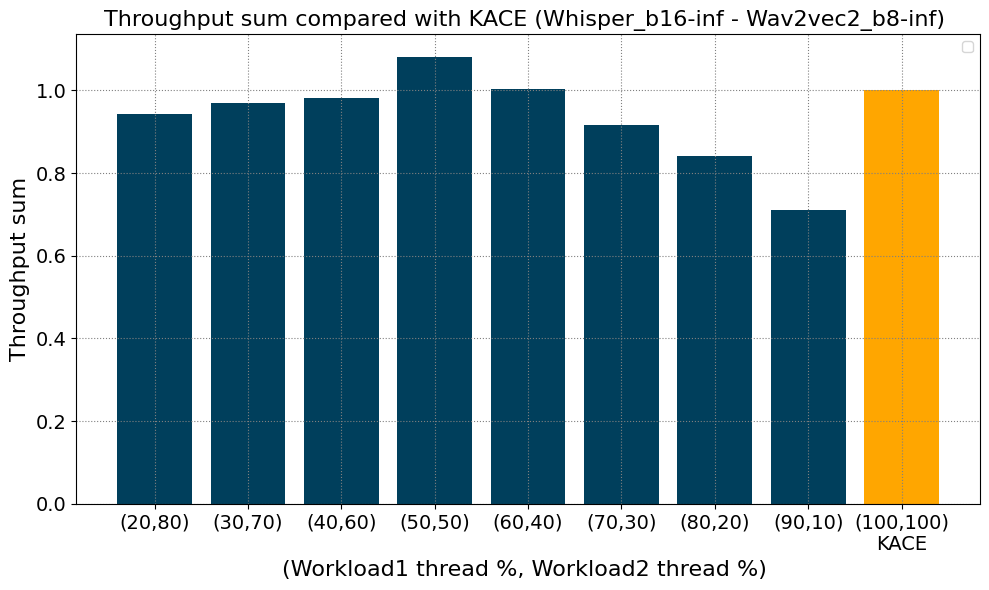

In [22]:
#plot share_throughput from 'share_steps_stage2.csv'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
# Load the data from the CSV file
#SHARE FILE
title_font = 16
axis_font = 16
legend_font = 14

def plot_sum_throughput_gain(sharedf, basedf,workload1, workload2, outdir, is_relative_gain):
    #find df row as workload1 == worklaod1 and workload2==workload2
    print(f"plotting share throughput gain for {workload1} - {workload2}")
    
    row1 = sharedf[(sharedf['workload1'] == workload1) & (sharedf['workload2'] == workload2)]
    w1_base, w2_base = basedf[(basedf['workload'] == workload1)], basedf[(basedf['workload'] == workload2)]
    assert not row1.empty
    # Assuming your DataFrame is named 'df'
    column_names_list = sharedf.iloc[:,2:-1].columns.tolist()  # Get column names as a list. remove 100+100

    # Create a list comprehension to convert each string to a tuple
    list_of_tuples = [tuple(name.strip('()').split(", ")) for name in column_names_list]
    #exclude None values in list_of_tuples
    list_of_tuples = [i for i in list_of_tuples if all(i)]
    # Print the resulting list of tuples
    x_labels, _= zip(*list_of_tuples)
    print(x_labels)
    #x_labels, x_labels_rev = zip(*x)
    #print(x_labels)
    


    y_values = row1.iloc[:, 2:]
    
    #unpack every tuple in y_values to y1,y2
    y_values = [eval(y) for y in y_values.values[0]]
    print(y_values)
    #get index of y_value that includes None in any element
    None_index = [i for i, y in enumerate(y_values) if None in y]
    if None_index:
        for idx in None_index:
            print(f"Exclusing None results in percentage LS{(idx+1)*10}, BE{100-(idx+1)*10}")
    #exclude None index in x_labels
    x_labels = [x_labels[i] for i in range(len(x_labels)) if i not in None_index]
    #print(x_labels)
    #get the 100% throughput of each model and normalize

    #not relative
    y1, y2 = [y[0] for y in y_values if all(y) ], [y[1] for y in y_values if all(y)]
    exclusive_y1, exclusive_y2 = [  w1_base[i[2:]] for i in x_labels], [w2_base[str(100-int(i[2:]))] for i in x_labels]
    #only add 100,100 if it is not none
    print("None value present in column:",None_index)
    if not None_index or (max(None_index)+1)*10 != 100:
        exclusive_y1.append(w1_base["100"])
        exclusive_y2.append(w2_base["100"])
        x_labels.append('LS100')

        
    #exclusive
    #print(exclusive_y2)
    
    # Create a figure and axis
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    #exclusive_y1_list = [s.tolist()[0] for s in exclusive_y1]
    #exclusive_y2_list = [s.tolist()[0] for s in exclusive_y2]
    #print("exclusivey1\n", exclusive_y1_list)
    #print("exclusivey2\n", exclusive_y2_list)
    #chage dataframe series to list
    #exclusive_y1
    print("y1",y1)
    print("y2",y2)

    print([y1_val + y2_val for y1_val, y2_val in zip(y1, y2)])
    # Plot the sum of throughputs
   
        

    if is_relative_gain:
        #compare MPS sum with current 100,100 approach
        y_sum =[y1_val + y2_val for y1_val, y2_val in zip(y1, y2)]
        #normalized by current approach
        y_sum = [y/y_sum[-1] for y in y_sum]
        #ax.plot(x_labels, y_sum, 'b-', marker='o')
        colors = ['#003f5c'] * (len(x_labels) - 1) + ['#ffa600']
        ax.bar(x_labels, y_sum, color=colors)
        
        #plot bar instead of line
        #ax.bar(x_labels, y_sum, color='b', alpha=0.5)
        #ax.set_ylim(0, 1.2)
    else:
        ax.plot(x_labels, [y1_val + y2_val for y1_val, y2_val in zip(y1, y2)], 'b-', marker='o', label="Shared throughput sum")
    #ax.plot(x_labels, [ex_y1 + ex_y2 for ex_y1, ex_y2 in zip(exclusive_y1_list, exclusive_y2_list)], 'r--', marker='o', label="Exclusive Sum Throughput")

    ax.set_xticks(x_labels)
    ax.set_xticklabels([f'({int(i[2:])},{100-int(i[2:])})'  if '100' not in i else "(100,100)\nKACE"  for i in x_labels], fontsize=axis_font-2)
    ax.set_xlabel('(Workload1 thread %, Workload2 thread %) ', fontsize=axis_font)

    ax.set_ylabel('Throughput sum', fontsize=axis_font) if is_relative_gain else plt.ylabel('Throughput sum', fontsize=axis_font)
    ax.tick_params(axis='y', labelsize=axis_font-2)
    #set y axis to 0-1.2
    #workload1
    workload1 = shorten_label(workload1)
    workload2 = shorten_label(workload2)
    
    ax.set_title(f'Throughput sum compared with KACE ({workload1} - {workload2}) ', fontsize=title_font) if is_relative_gain else plt.title(f'Actual Throughput of ({workload1} - {workload2}) ', fontsize=title_font)
    ax.legend()
    ax.grid(ls=':', color='gray')

    """
    ax.annotate(
        f"SLA = 90% of {workload1}'s exclusive throughput", 
        xy=(3, 20), 
        textcoords="offset points", 
        xytext=(0,-20), 
        ha='center',
        arrowprops=dict(
            arrowstyle='->', 
            lw=1,
            # connectionstyle='angle,angleA=90,angleB=00,rad=10'
        ),
        bbox=dict(boxstyle="round,pad=0.3", fc="0.85", ec="k", lw=0.72),
        )
    """

    x_axis = ax.get_xticks() 
    print(x_axis)
    #print(np.max(np.array(y1)))
    #ax.hlines(xmin=min(x_axis), xmax=max(x_axis), y=0.9*np.max(np.array(y1)), color='orange', ls='-', alpha=1) 
    
    if not os.path.exists(f'{outdir}'):
        os.makedirs(f'{outdir}')

    fig.tight_layout() 
    fig.savefig(f'{outdir}/{workload1}-{workload2}.png')
    #plt.show()
    
    
    

#iterrows in df, call def plot_share_throughput_gain
#df = pd.read_csv('0505share_train-inf__steps_stage2.csv')
#df = pd.read_csv('0520share_train-train_steps_stage2.csv')
#df = pd.read_csv('cleaned_0520_train-train_share_steps_stage2.csv')
df = pd.read_csv("cleaned_0520_inf-inf_share_steps_stage2.csv")
#df = pd.read_csv('share_steps_stage2.csv')
#read baseline_steps_stage2.csv to get the 100 throughput of each model

#BASELINE
baseline_df = pd.read_csv('baseline_steps_stage2.csv')


"""
for index, row in df.iterrows():
    
    workload1 = row['workload1']
    workload2 = row['workload2']
    sharetype = workload1.split("-")[-1]+"-"+workload2.split("-")[-1]
    if "mobilenet" in workload1 or "mobilenet" in workload2:
        continue
    if "resnet" in workload1 or "resnet" in workload2:
        continue
    plot_sum_throughput_gain(sharedf=df, basedf=baseline_df, 
                               workload1=workload1, workload2=workload2, 
                               outdir=f'collocation/shared_sum_throughput/relative_gain/0505{sharetype}', 
                                is_relative_gain=True)
"""



#workload1="bert-base-cased_batch2-train", workload2="vit_h_14_batch16-train", 
plot_sum_throughput_gain(sharedf=df, basedf=baseline_df, 
                               workload1="whisper-large-v2_batch16-inf", workload2="wav2vec2-base-960h_batch8-inf",
                               outdir=f'collocation/shared_sum_throughput/relative_gain/0505test', 
                               is_relative_gain=True)


In [1]:
import pandas as pd
#sharedf1 = pd.read_csv('/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0505share_train-inf__steps_stage2.csv')
#sharedf2 = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0617_train-inf_share_steps_stage2.csv")
sharedf3 = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0520share_train-train_steps_stage2.csv")


#BUG - 0520_inf-inf_share_steps_stage2.csv parses too many process time. use 0624 instead from inf-inf
#shareinf_infdf = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0520_inf-inf_share_steps_stage2.csv")
shareinf_infdf = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0624_inf-inf_share_steps_stage2.csv")
sharetrain_infdf = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0624_train-inf_share_steps_stage2.csv")
sharetrain_traindf = pd.read_csv("/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/tests/mps/analysis/stage2/0624_train-train_share_steps_stage2.csv")
def filter_nones(sharedf, outname):
    #filter  out sharedf1 for if row is not None
    None_cols = 0
    cleaned_rows = []
    for row in sharedf.iterrows():
        y_values = row[1].iloc[2:-1].to_list()
        #print(y_values.to_list())
        y_values = [eval(y) for y in y_values]
        #iterate through columns
        for tup in y_values:
            if None in tup:
                None_cols += 1
                print(tup)
        if None_cols <= 1:#could have only <= 1 None in a row
            cleaned_rows.append(row[1])
        else:
            print(f"deleted pairs:{row[1].iloc[:2]}")
        None_cols = 0
            
    #save cleaned_rows to a new csv file
    cleaned_sharedf1 = pd.DataFrame(cleaned_rows)
    cleaned_sharedf1.columns = sharedf.columns
    cleaned_sharedf1.to_csv(f'cleaned_{outname}', index=False)
#filter_nones(sharedf1, "0505share_train-inf__steps_stage2.csv")
#filter_nones(sharedf2, "0617_train-inf_share_steps_stage2.csv")
#filter_nones(sharedf3, "0520_train-train_share_steps_stage2.csv")
#filter_nones(shareinf_infdf, "0520_inf-inf_share_steps_stage2.csv")
# Write to CSV

def merge_share_files(basefile, mergefile, outname):
# Read the CSV files into DataFrames
    df1 = pd.read_csv(basefile)
    df2 = pd.read_csv(mergefile)

    # Create a set of keys from the first DataFrame
    keys_df1 = set(zip(df1['workload1'], df1['workload2']))

    # Filter the second DataFrame to exclude keys present in the first DataFrame
    df2_filtered = df2[~df2.apply(lambda row: (row['workload1'], row['workload2']) in keys_df1, axis=1)]

    # Concatenate the first DataFrame with the filtered second DataFrame
    merged_df = pd.concat([df1, df2_filtered], ignore_index=True)

    # Save or display the merged DataFrame
    print(merged_df)
    merged_df.to_csv(outname, index=False)

#merge_share_files("cleaned_0505share_train-inf__steps_stage2.csv", "cleaned_0617_train-inf_share_steps_stage2.csv", "merged0505_0617_share_steps_stage2.csv")
#merge_share_files("merged0505_0617_share_steps_stage2.csv", "cleaned_0520_train-train_share_steps_stage2.csv", "merged0505_0617_0520_share_steps_stage2.csv")
#merge_share_files("merged0505_0617_0520_share_steps_stage2.csv", "cleaned_0520_inf-inf_share_steps_stage2.csv", "merged0505_0617_0520_0520_share_steps_stage2.csv")
#read "merged0505_0617_0520_0520_share_steps_stage2.csv"

#merge_share_files("0505share_train-inf__steps_stage2.csv", "0617_train-inf_share_steps_stage2.csv", "merged0505_0617_share_steps_stage2.csv")
#merge_share_files("merged0505_0617_share_steps_stage2.csv", "0520share_train-train_steps_stage2.csv", "merged0505_0617_0520_share_steps_stage2.csv")
#merge_share_files("merged0505_0617_0520_share_steps_stage2.csv", "0624_inf-inf_share_steps_stage2.csv", "merged0505_0617_0520_0624_share_steps_stage2.csv")

#merge "0520share_train-train_steps_stage2.csv" with 0624_inf-inf_share_steps_stage2.csv

#merge all 0624 files
merge_share_files(basefile="MPS100_0624_inf-inf_share_steps_stage2.csv", mergefile="MPS100_0624_train-inf_share_steps_stage2.csv", outname="merge_MPS100_0624_infinf_traininf_share_steps_stage2.csv")
merge_share_files(basefile="merge_MPS100_0624_infinf_traininf_share_steps_stage2.csv", mergefile="MPS100_0624_train-train_share_steps_stage2.csv", outname="merge_MPS100_0624_infinf_traininf_traintrain_share_steps_stage2.csv")




merged_df = pd.read_csv("merge_MPS100_0624_infinf_traininf_traintrain_share_steps_stage2.csv")
#filter out workload1 and workload2 that contains mobilenet and resnet
merged_df = merged_df[~merged_df['workload1'].str.contains("mobilenet")]
merged_df = merged_df[~merged_df['workload2'].str.contains("mobilenet")]
merged_df = merged_df[~merged_df['workload1'].str.contains("resnet")]
merged_df = merged_df[~merged_df['workload2'].str.contains("resnet")]
print("without mobilenet, resnet", merged_df.shape)




                      workload1                         workload2  \
0    bert-base-cased_batch2-inf      whisper-large-v2_batch16-inf   
1    bert-base-cased_batch2-inf       whisper-large-v2_batch8-inf   
2    bert-base-cased_batch2-inf       bert-base-cased_batch16-inf   
3    bert-base-cased_batch2-inf        bert-base-cased_batch8-inf   
4    bert-base-cased_batch2-inf   vit-base-patch16-224_batch8-inf   
..                          ...                               ...   
225      vit_h_14_batch16-train   vit-base-patch16-224_batch2-inf   
226      vit_h_14_batch16-train  vit-base-patch16-224_batch16-inf   
227      vit_h_14_batch16-train     wav2vec2-base-960h_batch2-inf   
228      vit_h_14_batch16-train     wav2vec2-base-960h_batch8-inf   
229      vit_h_14_batch16-train        bert-base-cased_batch2-inf   

                                 (LS10, BE90)  \
0    (10.608698627131464, 3.6256373677374336)   
1     (10.67479984750286, 3.3551727020381805)   
2     (10.27960526315789

In [9]:
#plot train_file_steps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# create random combination of any 2 keys in pair. 


def plot_relative_throughput_gain(relative_throughput_gain, workload1, workload2, outdir):
    print(f"plotting relative throughput gain for {workload1} - {workload2}")
    data1 = relative_throughput_gain[workload1]
    data2 = relative_throughput_gain[workload2]
   
    #get common percentages of data1 and data2
    #common_x
    total_percentage = set([i for i in range(10, 91, 10)])
    excludek1, excludek2 = total_percentage - set([j[0] for j in data1]), total_percentage - set([j[0] for j in data2])
    #delete entry in data2 if it is in 100-excludek1
    data1 = [i for i in data1 if 100-i[0] not in excludek2]
    data2 = [i for i in data2 if 100-i[0] not in excludek1]
    print(f"no datas - {workload1}_MPS: {excludek1}, {workload2}_MPS: {excludek2}")
    #print(data1)
    #print(data2)

    
    # Sort data by percentage
    data1.sort(key=lambda x: x[0])
    data2.sort(key=lambda x: x[0])

    # Extract x and y values for each workload
    x1, y1 = zip(*data1)
    x2, y2 = zip(*data2[::-1])  # Reverse the order of the second workload

    # Create x-axis labels
    #get xlabels by sorting data1[0]
    
    #x_labels = [i for i in range(10, 91, 10)]
    x_labels = x1
    #print(x_labels)
    x_labels_rev = [100 - i for i in x_labels]  # Reversed order for the second workload

    # Align y values with the x-axis labels
    y1_dict = dict(data1)
    y2_dict = dict(data2)

    y1_aligned = [y1_dict.get(x, 0) for x in x_labels]
    y2_aligned = [y2_dict.get(x, 0) for x in x_labels_rev]
    #exclude y1 and y2 if they are 0
    #
    


    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(x_labels, y1_aligned, 'b-',marker='o', label=f"{workload1} Relative Throughput Gain")
    plt.plot(x_labels, y2_aligned, 'r-',marker='v', label=f"{workload2} Relative Throughput Gain")
    #print xlabels as (10.90), (20,80)...
    plt.xticks(x_labels, [f'({i},{100-i})' for i in x_labels])
    plt.xlabel('(workload1 thread %, worload2 thread %) ')
    plt.ylabel('Relative Throughput Gain')
    #set y axis to 0-1.2
    plt.ylim(0, 1.2)
    plt.title(f'Prediction - Relative Throughput Gain ({workload1} - {workload2}) ')
    plt.legend()
    
    if not os.path.exists(f'{outdir}'):
        os.makedirs(f'{outdir}')
    plt.savefig(f'{outdir}/{workload1}-{workload2}.png')
    #plt.show()
    #save fig with tight layout
    

# Plotting for two chosen workloads
#get all workload pair combinations from train_relative_throughput.keys()
#plot all pairs
workload_pairs = [(i, j) for i in train_relative_throughput.keys() for j in train_relative_throughput.keys() if i != j]
#exclude pair with reverse order
output_dir = workload1.split("-")[-1] + "-" + workload2.split("-")[-1]
#plot_relative_throughput_gain(train_relative_throughput, "mobilenet_v2_1.0_224_batch2-inf", "bert-base-cased_batch16-inf", "collocation/exclusive_gain_prediction_figure/inf-inf")

for pair in workload_pairs:
    output_dir = pair[0].split("-")[-1] + "-" + pair[1].split("-")[-1]
    if output_dir == "inf-train":
        #train-inf  and inf train is the same - no need to get both
        continue
    plot_relative_throughput_gain(train_relative_throughput , pair[0], pair[1], f"collocation/exclusive_gain_prediction_figure/{output_dir}")

train_relative_throughput.keys()





NameError: name 'train_relative_throughput' is not defined